# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
colab = False # если работаете на своём компьютере, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams. 

In [5]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


Медианна math score = 66.0
Медианна reading score = 70.0
Медианна writing score = 69.0


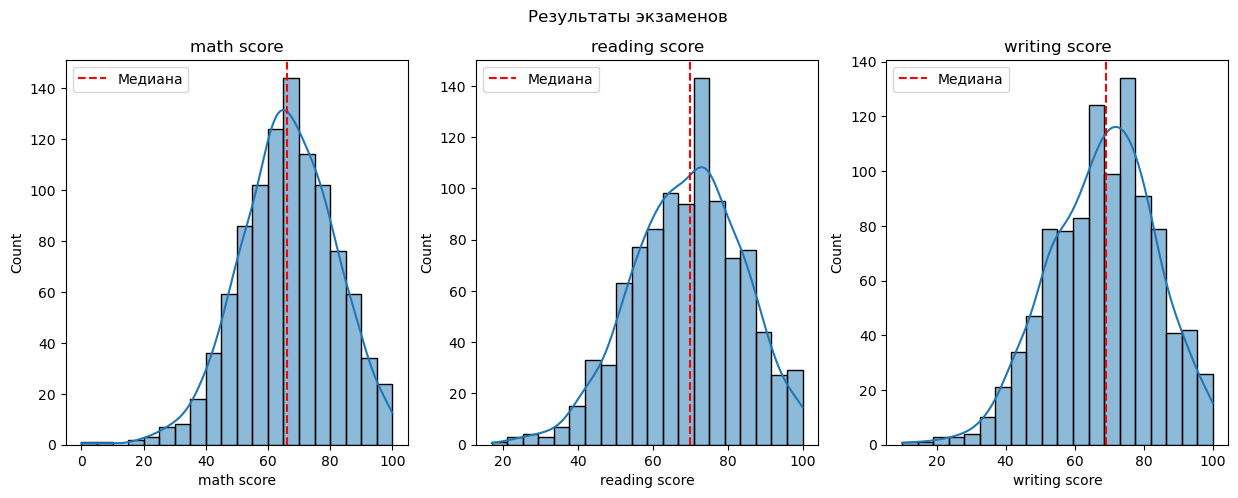

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Результаты экзаменов")

for ax, subject in zip(axes, ["math score", "reading score", "writing score"]):
    print(f"Медианна {subject} = {df[subject].median()}")
    sns.histplot(df[subject], bins=20, kde=True, ax=ax)
    ax.axvline(df[subject].median(), color='red', linestyle='dashed', label='Медиана')
    ax.set_title(subject)
    ax.legend()

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню? 

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


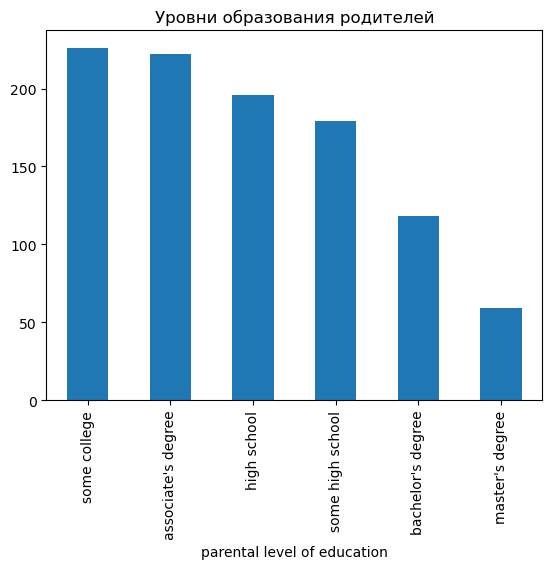

In [ ]:
education_counts = df['parental level of education'].value_counts()
education_counts.plot(kind='bar', title='Уровни образования родителей')
plt.show() 

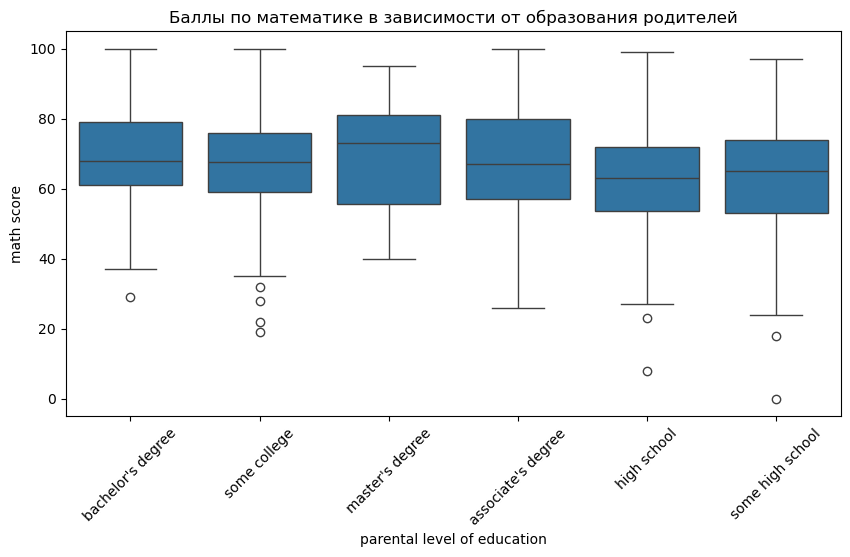

In [ ]:
# График баллов по математике в зависимости от образования родителей
plt.figure(figsize=(10, 5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Баллы по математике в зависимости от образования родителей")
plt.show() # Баллы отличаются :(


#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [14]:
high_achievers = df[(df['gender'] == 'female') & (df['math score'] > 90) & (df['reading score'] > 90) & (df['writing score'] > 90)]
print(f"Число студенток с >90 баллами по всем предметам: {len(high_achievers)}")


Число студенток с >90 баллами по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение
 

In [16]:
stats = df.groupby("gender")[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
display(stats)

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола 
###### (подсказка: используете agg())

In [ ]:
lunch_prep_stats = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg(['mean'])
display(lunch_prep_stats)
# Обед и подготовка ввлияет на средний балл студентов 

math score reading score  \
                                                  mean          mean   
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                            writing score  
                                                     mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы 

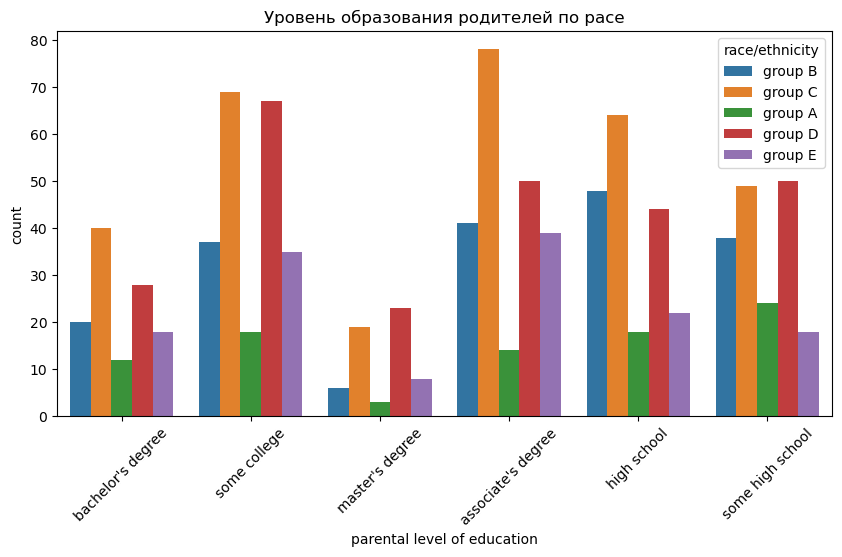

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')
plt.xticks(rotation=45)
plt.title("Уровень образования родителей по расе")
plt.show()


#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

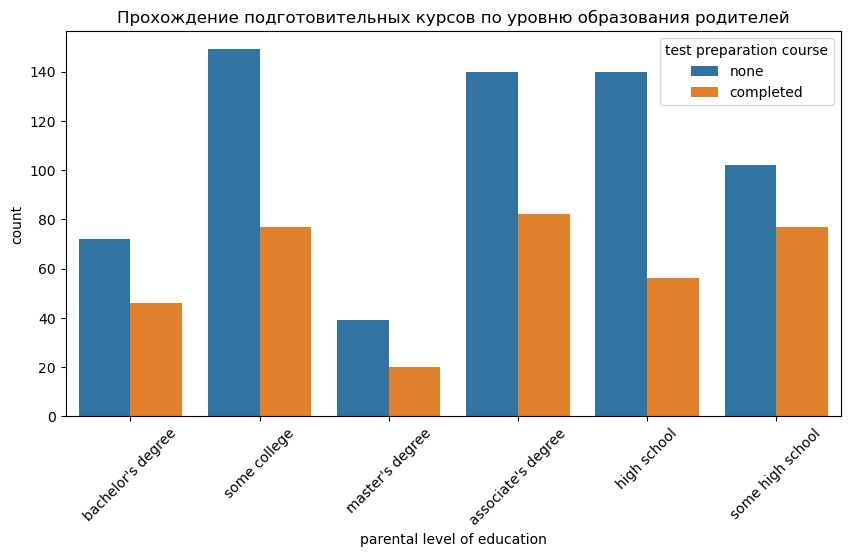

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')
plt.xticks(rotation=45)
plt.title("Прохождение подготовительных курсов по уровню образования родителей")
plt.show()


In [21]:
prep_counts = df[df['test preparation course'] == 'completed']['parental level of education'].value_counts()
display(prep_counts)

parental level of education
associate's degree    82
some college          77
some high school      77
high school           56
bachelor's degree     46
master's degree       20
Name: count, dtype: int64

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

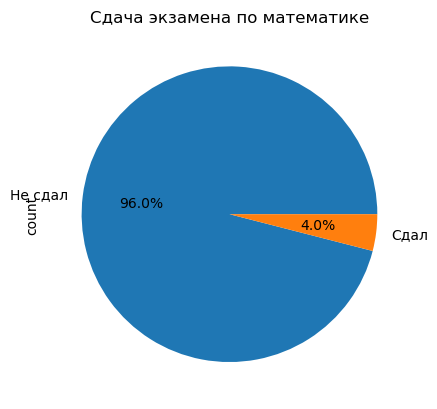

In [22]:
df['passed_math'] = df['math score'] >= 40
df['passed_math'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Не сдал', 'Сдал'], title='Сдача экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

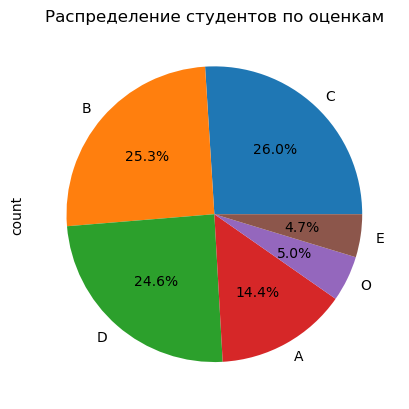

In [23]:
def get_grade(row):
    avg_score = (row['math score'] + row['reading score'] + row['writing score']) / 3
    if row['math score'] < 40:
        return 'E'
    elif avg_score <= 40:
        return 'E'
    elif avg_score <= 60:
        return 'D'
    elif avg_score <= 70:
        return 'C'
    elif avg_score <= 80:
        return 'B'
    elif avg_score <= 90:
        return 'A'
    else:
        return 'O'

df['grade'] = df.apply(get_grade, axis=1)
df['grade'].value_counts().plot.pie(autopct='%1.1f%%', title='Распределение студентов по оценкам')
plt.show()


#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

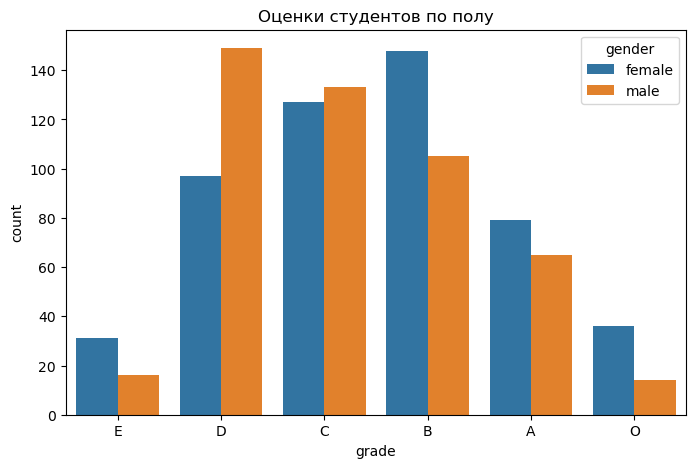

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='grade', hue='gender', order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.title("Оценки студентов по полу")
plt.show() # Female поличили больше оценок O, A, B
